## Malaria Detection Analysis

Sita Robinson

<img src="https://www.lalpathlabs.com/blog/wp-content/uploads/2017/06/malaria-fever.jpg" style="height:200px">`

<h4>Introduction </h4>

Malaria is a life threatening disease caused by parasites that are transmitted through female mosquitoes.  Symptoms including fever, headache, and chills appear within 10-15 days after the mosquito bite.  If not treated this could lead to death or severe illness.  This dataset is orginally hosted by NIH and shared on Kaggle: https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria.  The dataset contains 27,558 iages of cells with equal instances of parasitized and unparasitized cells.  

Take a look below at the visualization of Malaria death rates over time created by Our World in Data.  Africa from 1990-2017 seems to have had the most death rates out of all countries. 

In [46]:
from IPython.display import IFrame

In [47]:
display(IFrame("https://ourworldindata.org/grapher/malaria-death-rates?year=1991", width=900, height=650))

<h4>Purpose </h4>

The purpose of this project was to detect parasitized and unparasitized cells to see if an individual has malaria or not.  

<hr>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fastai import *
from fastai.vision import *
from fastai.callbacks.hooks import *

In [2]:
img_dir='cell_images/'
path=Path(img_dir)
path

WindowsPath('cell_images')

In [3]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(flip_vert=True, max_warp=0), size=224,bs=64, num_workers=0).normalize(imagenet_stats)

In [4]:
print(f'Classes: \n {data.classes}')

Classes: 
 ['Parasitized', 'Uninfected']


As you can see the uninfected cells seem to be mostly clear.  

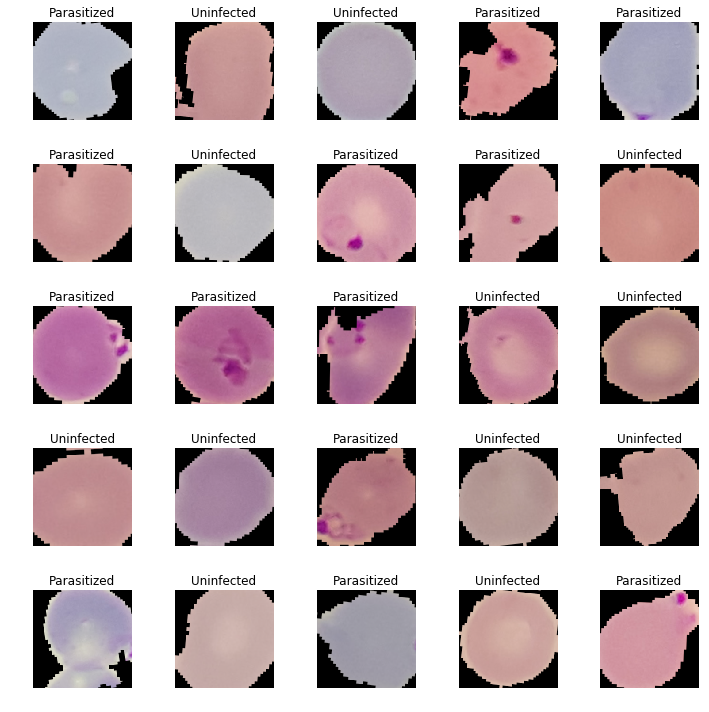

In [5]:
data.show_batch(rows=5, figsize=(10,10))

<h3>Modeling </h3>

**CNN (Convolutional Neural Network)**

The purpose of the Convolutional Neural Network is to reduce images in a way that easier to process but doesn't affect the prediction.  The Convolutional Neural Network contains a few layers including the convolutional layer, pooling layer, and a fully connected layer.  
<img src="https://www.mdpi.com/information/information-07-00061/article_deploy/html/images/information-07-00061-g001.png" style="height:200px">

With complex images more layers are added which means there is more of a computational cost or takes more time to run the neural network. 

**Convolutional Layer**
* The convolutional layer moves through the whole image based on a certain stride length with the purpose of extracting high level features such as edges, color, gradient orientation.
<img src="https://miro.medium.com/max/790/1*1VJDP6qDY9-ExTuQVEOlVg.gif" style="height:200px">

**Pooling Layer**
* The pooling layer has the purpose of decreasing the computational power required to process the data using dimensionality reduction.  This layer is responsible for extracting dominant features that are rotational and positional invariant.
<img src="https://miro.medium.com/max/792/1*uoWYsCV5vBU8SHFPAPao-w.gif" style="height:200px">

**Fully Connected Layer**
* Purpose is to learn nonlinear combinations of the high level features extracted.

To learn more visit: https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

Running a CNN and plotting the output

epoch,train_loss,valid_loss,accuracy
1,0.183237,0.137722,0.949011


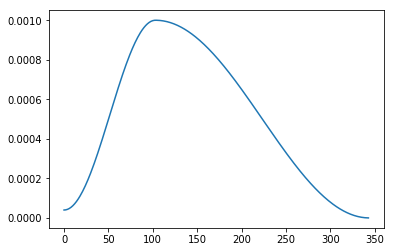

In [6]:
learner = create_cnn(data, models.resnet18, metrics=[accuracy])
learner.fit_one_cycle(1,1e-3)
learner.recorder.plot_lr()

Saving the output of the model

In [7]:
learner.save('stage-1')

In [8]:
interp = ClassificationInterpretation.from_learner(learner)

Plotting the confusion matrix.  As expected, the labels that were predicted correctly (actually parasitized and predicted parasitized, actually uninfected and predicted uninfected) were more common than those that were inaccurately predicted (predicted parasitized but actually uninfected, predicted uninfected but actually parasitized).  

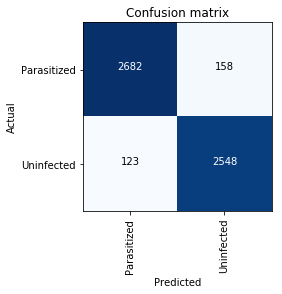

In [9]:
interp.plot_confusion_matrix()

Showing some of the results from the model.  The top label is the actual label and the bottom label was the predicted label.

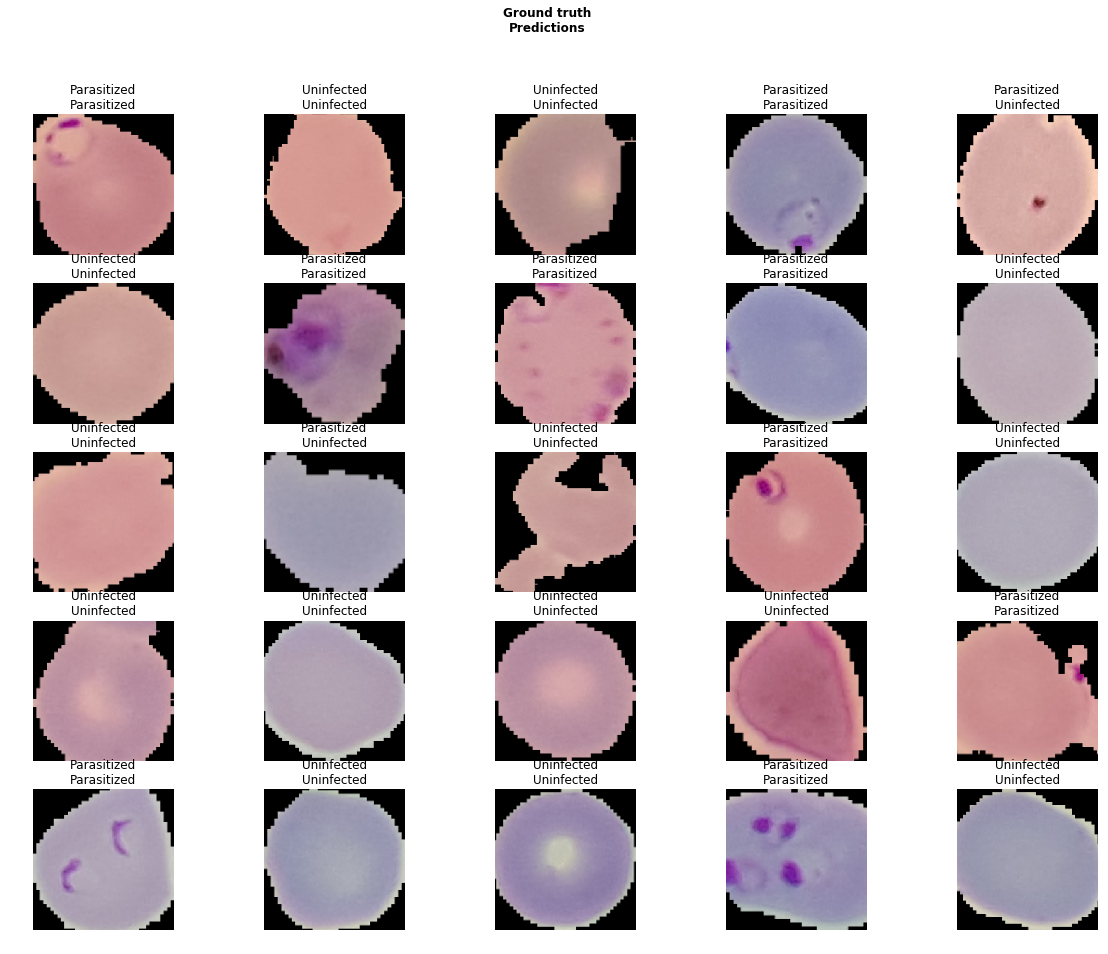

In [41]:
learner.show_results(rows=5, figsize=(20,15), imgsize=5)

Showing the top 25 losses

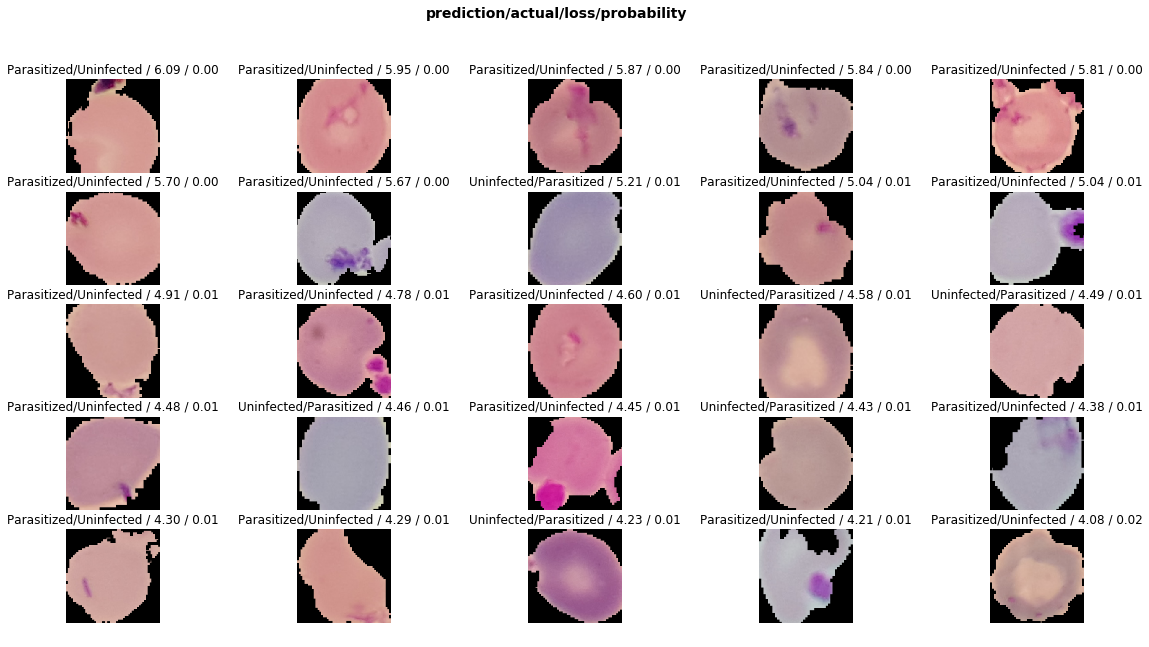

In [27]:
interp.plot_top_losses(25, figsize=(20,10))